In [2]:
library(tidyverse)
source("../R/scripts/local.R")
source("../R/functions/database.R")

area_data <- tbl(con, "area_data")
wa_fixed_data <- tbl(con, "wa_fixed_data")
county_info <- tbl(con, "county_info")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [64]:

county_info <- county_info %>% unique()
RPostgres::dbWriteTable(
    con,
    "county_info",
    county_info,
    overwrite = TRUE
)

In [ ]:
RPostgres::dbWriteTable(
    con,
    "area_data",
    area_data,
    overwrite = TRUE
)

In [119]:
RPostgres::dbWriteTable(
    con,
    "wa_fixed_data",
    wa_fixed_data,
    overwrite = TRUE
)

In [3]:
dbRemoveTable(con, "area_data")

In [121]:
wa_fixed_data

# Source:   table<wa_fixed_data> [?? x 18]
# Database: postgres
#   [kkosmydkepdopx@ec2-18-208-55-135.compute-1.amazonaws.com:5432/d5mrpv86vdo3si]
   log_rec_no provider_id     frn provider_name        dba_name holding_company…
        <int>       <int>   <int> <chr>                <chr>    <chr>           
 1     216353       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 2     216354       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 3     216355       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 4     222684       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 5     222685       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 6     222686       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 7     222687       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 8     222688       75890 3723822 Level  3 Communicat… Century… CenturyLink, In…
 9     222689       75890 3723822 Level  3 

In [81]:
wa_fixed_data <- wa_fixed_data %>% inner_join(county_info, by = c("BlockCode" = "block_code")) %>% 
    data.frame()

In [87]:
wa_fixed_data

# Source:   table<wa_fixed_data> [?? x 27]
# Database: postgres
#   [kkosmydkepdopx@ec2-18-208-55-135.compute-1.amazonaws.com:5432/d5mrpv86vdo3si]
   LogRecNo Provider_Id     FRN ProviderName    DBAName HoldingCompanyN… HocoNum
      <int>       <int>   <int> <chr>           <chr>   <chr>              <int>
 1   162379       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 2   162380       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 3   162381       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 4   162382       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 5   162383       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 6   162384       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 7   162385       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 8   162386       75835 4329884 Kalama Telepho… Kalama… Scatter Creek L…  131165
 9   162387       75835 4329884 Kalama Tele

In [118]:
wa_fixed_data <- wa_fixed_data %>%
    select(
        LogRecNo,
        Provider_Id,
        FRN,
        ProviderName,
        DBAName,
        HoldingCompanyName,
        HocoNum,
        HocoFinal,
        StateAbbr,
        BlockCode,
        TechCode,
        Consumer,
        MaxAdDown,
        MaxAdUp,
        Business,
        county_id.x,
        county_name.x,
        tract.x
    ) %>%
    filter(
        county_name.x == "Adams County" |
        county_name.x == "Asotin County" |
        county_name.x == "Ferry County" |
        county_name.x == "Garfield County" |
        county_name.x == "Lincoln County" |
        county_name.x == "Pend Oreille County" |
        county_name.x == "Spokane County" |
        county_name.x == "Stevens County" |
        county_name.x == "Whitman County"
    ) %>%
    rename(
        log_rec_no = LogRecNo,
        provider_id = Provider_Id,
        frn = FRN,
        provider_name = ProviderName,
        dba_name = DBAName,
        holding_company_name = HoldingCompanyName,
        hoco_num = HocoNum,
        hoco_final = HocoFinal,
        state_abbr = StateAbbr,
        block_code = BlockCode,
        tech_code = TechCode,
        consumer = Consumer,
        max_ad_down = MaxAdDown,
        max_ad_up = MaxAdUp,
        business = Business,
        county_id = county_id.x,
        county_name = county_name.x,
        tract = tract.x
    ) %>% data.frame()

In [95]:
wa_fixed_data %>%
    group_by(county_name.x) %>% 
    select(
        county_name.x
    )


NULL

In [2]:
library(ggplot2)

In [10]:
library(ggplot2)
library(tidyr)
library(tidyverse)
household_income_data <- read.csv("../data/Household_Income.csv")
ss_income_data <- read.csv("../data/Social_Security_Income.csv")
public_assistance_data <- read.csv("../data/Public_Assistance.csv")
naturalization_data <- read.csv("../data/B05011 PERIOD OF NATURALIZATION.csv")
nativity_data <- read.csv("../data/B05012 NATIVITY IN THE UNITED STATES.csv")
transportation_data <- read.csv("../data/B08101 MEANS OF TRANSPORTATION TO WORK BY AGE.csv")
poverty_data <- read.csv("../data/B17020 POVERTY STATUS IN THE PAST 12 MONTHS BY AGE.csv")
types_computer_data <- read.csv("../data/B28001 TYPES OF COMPUTERS IN HOUSEHOLD.csv")
presence_computer_data <- read.csv("../data/B28003 PRESENCE OF COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD.csv")
internet_subscription_data <- read.csv("../data/B28003 PRESENCE OF COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD.csv")
voting_age_data <- read.csv("../data/B29002 CITIZEN, VOTING-AGE POPULATION BY EDUCATIONAL ATTAINMENT.csv")
occupation_over_16_data <- read.csv("../data/OCCUPATION_BY_SEX_FOR_THE_FULL-TIME_YEAR-ROUND_CIVILIAN_EMPLOYED_POPULATION_16_YEARS_AND_OVER.csv")
type_computer_internet_sub_data <- read.csv("../data/TYPES_OF_COMPUTERS_AND_INTERNET_SUBSCRIPTIONS.csv")
type_internet_sub_characteristics <- read.csv("../data/TYPES_OF_INTERNET_SUBSCRIPTIONS_BY_SELECTED_CHARACTERISTICS.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



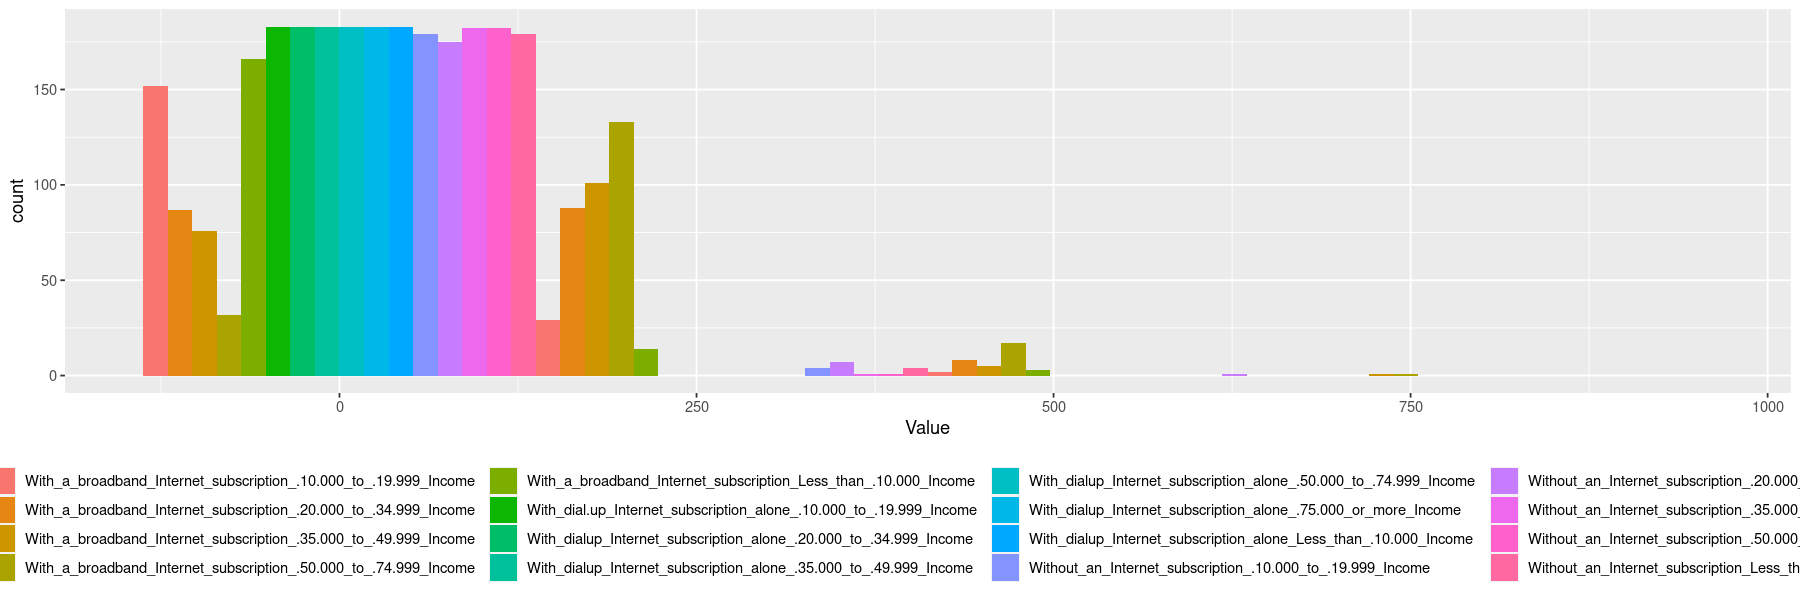

In [82]:
options(repr.plot.width = 15, repr.plot.height = 5)
household_income_data %>%
    select(
        With_dialup_Internet_subscription_alone_Less_than_.10.000_Income,
        With_a_broadband_Internet_subscription_Less_than_.10.000_Income,
        Without_an_Internet_subscription_Less_than_.10.000_Income,
        With_dial.up_Internet_subscription_alone_.10.000_to_.19.999_Income,
        With_a_broadband_Internet_subscription_.10.000_to_.19.999_Income,
        Without_an_Internet_subscription_.10.000_to_.19.999_Income,
        With_dialup_Internet_subscription_alone_.20.000_to_.34.999_Income,
        With_a_broadband_Internet_subscription_.20.000_to_.34.999_Income,
        Without_an_Internet_subscription_.20.000_to_.34.999_Income,
        With_dialup_Internet_subscription_alone_.35.000_to_.49.999_Income,
        With_a_broadband_Internet_subscription_.35.000_to_.49.999_Income,
        Without_an_Internet_subscription_.35.000_to_.49.999_Income,
        With_dialup_Internet_subscription_alone_.50.000_to_.74.999_Income,
        With_a_broadband_Internet_subscription_.50.000_to_.74.999_Income,
        Without_an_Internet_subscription_.50.000_to_.74.999_Income,
        With_dialup_Internet_subscription_alone_.75.000_or_more_Income

    ) %>% 
    gather(key = Range, value = Value) %>% 
    ggplot(aes(x = Value, fill = Range)) +
    geom_histogram(position = "dodge", bins = 4) +
    theme(legend.position = "bottom")



In [13]:
names(household_income_data)

[1] "Label"                                                             
 [2] "With_dialup_Internet_subscription_alone_Less_than_.10.000_Income"  
 [3] "With_a_broadband_Internet_subscription_Less_than_.10.000_Income"   
 [4] "Without_an_Internet_subscription_Less_than_.10.000_Income"         
 [5] "With_dial.up_Internet_subscription_alone_.10.000_to_.19.999_Income"
 [6] "With_a_broadband_Internet_subscription_.10.000_to_.19.999_Income"  
 [7] "Without_an_Internet_subscription_.10.000_to_.19.999_Income"        
 [8] "With_dialup_Internet_subscription_alone_.20.000_to_.34.999_Income" 
 [9] "With_a_broadband_Internet_subscription_.20.000_to_.34.999_Income"  
[10] "Without_an_Internet_subscription_.20.000_to_.34.999_Income"        
[11] "With_dialup_Internet_subscription_alone_.35.000_to_.49.999_Income" 
[12] "With_a_broadband_Internet_subscription_.35.000_to_.49.999_Income"  
[13] "Without_an_Internet_subscription_.35.000_to_.49.999_Income"        
[14] "With_dialup_Internet_subscription_alone_.50.000_to_.74.999_Income" 
[15] "With_a_broadband_Internet_subscription_.50.000_to_.74.999_Income"  
[16] "Without_an_Internet_subscription_.50.000_to_.74.999_Income"        
[17] "With_dialup_Internet_subscription_alone_.75.000_or_more_Income"    
[18] "With_a_broadband_Internet_subscription_.75.000_or_more_Income"     
[19] "Without_an_Internet_subscription_.75.000_or_more_Income"           
[20] "tract"                                                             
[21] "county"                                                            
[22] "Standarized_With_dialup_Internet_subscription_alone"               
[23] "standarized_With_a_broadband_Internet_subscription"                
[24] "standardized_Without_an_Internet_subscription"                     
[25] "standarized_With_dial.up_Internet_subscription_alone"              
[26] "standarized_With_a_broadband_Internet_subscription.1"              
[27] "standarized_Without_an_Internet_subscription"                      
[28] "standarized_With_dialup_Internet_subscription_alone"               
[29] "standarized_With_a_broadband_Internet_subscription.2"              
[30] "standarized_Without_an_Internet_subscription.1"                    
[31] "standarized_With_dialup_Internet_subscription_alone.1"             
[32] "standarized_With_a_broadband_Internet_subscription.3"              
[33] "standarized_Without_an_Internet_subscription.2"                    
[34] "standardized_With_dialup_Internet_subscription_alone"              
[35] "standardized_With_a_broadband_Internet_subscription"               
[36] "standardized_Without_an_Internet_subscription.1"                   
[37] "standarized_With_dialup_Internet_subscription_alone.2"             
[38] "standardized_With_a_broadband_Internet_subscription.1"             
[39] "standardized_Without_an_Internet_subscription.2"                   
[40] "index"